# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

I {**EDSA-Team_8**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Belief Analysis 2022
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received, Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
#importing the required libraries
# Libraries for data loading, data manipulation and data visulisation

#Libraries for data preparation and model building

# Setting global constants to ensure notebook results are reproducible

 <a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import re

import nltk


In [3]:
df = pd.read_csv('train.csv')
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


 <a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

In [4]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [6]:
df.skew()

sentiment   -0.683959
tweetid     -0.008471
dtype: float64

In [7]:
df_plot = df[['sentiment', 'message']].groupby('sentiment').count() # A plot of 

In [8]:
df_plot

,message
sentiment,
-1,1296
0,2353
1,8530
2,3640


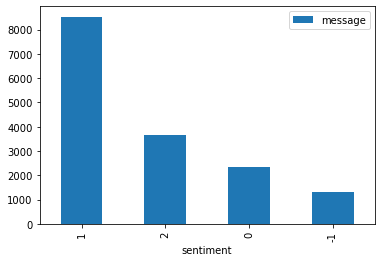

In [9]:
# Plot of sentiments and its occureence 
df_plot.sort_values('message', ascending=False).plot(kind='bar')
plt.show()

At this point, there is a variety of class imbalance with majority of the tweets being centered towards class one (1).

## Transforming text into numbers


The message feature(column) will be transformed to numbers before fitting the  trained data set to a machine learning model 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
#vect = CountVectorizer()
#X_count = vect.fit_transform(df['message'].values.astype(str)) # converting the message object to strings

In [12]:
#X_count.shape

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


## Text Cleaning

 Next step is getting the data into a usable format by removing all web-urls found in the message, removing all punctuations, converting all texts letters to lower case for easy use amongst others.

In [14]:
df.message[1500]

'RT @ChuckNellis: The climate change SCAM, revealed! https://t.co/guGT9rmyP7'

### Removing web-urls

In [15]:
#removes all websites and replaces them with the text 'web-url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [16]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [17]:
df.message[1500]

'RT @ChuckNellis: The climate change SCAM, revealed! url-web'

### Converting strings to lowercase letters

In [18]:
df['message'] = df['message'].str.lower() # converts all strings found in the data to lower case letters

In [19]:
df

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt @rawstory: researchers say we have three ye...,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954
...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001
15815,2,rt @washingtonpost: how climate change could b...,17856
15816,0,notiven: rt: nytimesworld :what does trump act...,384248
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732


### Removing Punctuations

In [20]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
#define a function to remove all punctuations from the feature
def remove_punctuation(word):
    return ''.join([i for i in word if i not in string.punctuation]) 

In [22]:
df['message'] = df['message'].apply(remove_punctuation)
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


In [23]:
df.message[5005]

'rt ajplus leo takes on climate change skeptics ã¢â‚¬å“you might as well not believe in gravityã¢â‚¬ï†\x9d urlweb'

In [24]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [25]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)

In [26]:
df.head()

,sentiment,message,tweetid,tokens
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, we, have, thr..."
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y..."
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, its, 2016, and, a, racis..."


In [27]:
from nltk.corpus import stopwords


In [28]:
def remove_stop_words(tokens):    
    return [i for i in tokens if i not in stopwords.words('english')]

In [29]:
df['tokens'] = df['tokens'].apply(remove_stop_words)

In [30]:
df.head()

,sentiment,message,tweetid,tokens
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[like, lack, evidence, anthropogenic, global, ..."
2,2,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, three, years,..."
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, pivotal, year, war..."
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, 2016, racist, sexist, cl..."


In [31]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
stemmer = PorterStemmer()

In [32]:
def extract_stem(words, stemmer):
    return  " ".join([stemmer.stem(word) for word in words])

In [33]:
df['stem'] = df['tokens'].apply(extract_stem, args=(stemmer, ))

In [34]:
df.head()

,sentiment,message,tweetid,tokens,stem
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[like, lack, evidence, anthropogenic, global, ...",like lack evid anthropogen global warm
2,2,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, three, years,...",rt rawstori research say three year act climat...
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, pivotal, year, war...",todayinmak wire 2016 pivot year war climat cha...
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, 2016, racist, sexist, cl...",rt soynoviodetoda 2016 racist sexist climat ch...


In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [36]:
def extract_lemma(words, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word) for word in words] )   

In [37]:
df['lemma'] = df['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [38]:
df.message[15815]

'rt washingtonpost how climate change could be breaking up a 200millionyearold relationship urlweb'

In [39]:
df.head()

,sentiment,message,tweetid,tokens,stem,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[like, lack, evidence, anthropogenic, global, ...",like lack evid anthropogen global warm,like lack evidence anthropogenic global warming
2,2,rt rawstory researchers say we have three year...,698562,"[rt, rawstory, researchers, say, three, years,...",rt rawstori research say three year act climat...,rt rawstory researcher say three year act clim...
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,"[todayinmaker, wired, 2016, pivotal, year, war...",todayinmak wire 2016 pivot year war climat cha...,todayinmaker wired 2016 pivotal year war clima...
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954,"[rt, soynoviodetodas, 2016, racist, sexist, cl...",rt soynoviodetoda 2016 racist sexist climat ch...,rt soynoviodetodas 2016 racist sexist climate ...


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vect = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(2, 2))
X = vect.fit_transform(df['lemma'].values.astype(str))
X

<15819x85389 sparse matrix of type '<class 'numpy.int64'>'
	with 167269 stored elements in Compressed Sparse Row format>

In [42]:
my_dict = vect.vocabulary_

In [43]:
total = sum([v for v in my_dict.values()])
total 



3645597966

In [44]:
# # how many words appear more than 10 times?
# # how many words of the total does that account for?
# print(len([v for v in my_dict.values() if v >= 13000]))
# occurs_more_than_10_times = sum([v for v in my_dict.values() if v >= 13000])
# print(occurs_more_than_10_times)

In [45]:
#sorted(my_dict)

In [46]:
X = X
y = df['sentiment']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [49]:
logreg = LogisticRegression(multi_class='ovr')

In [50]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average = 'weighted')

In [53]:
f1

0.6777161569709305

In [54]:
test = pd.read_csv('test.csv')
test

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


In [55]:
test['message'] = test['message'].str.lower()

In [56]:
#removes all websites and replaces them with the text 'web-url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
test['message'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [57]:
test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985
3,@karoli @morgfair @osborneink @dailykos \r\npu...,476263
4,rt @fakewillmoore: 'female orgasms cause globa...,872928


In [58]:
test['message'] = test['message'].apply(remove_punctuation)

In [59]:

test['tokens'] = test['message'].apply(tokeniser.tokenize)
test.head()

,message,tweetid,tokens
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe..."
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl..."
3,karoli morgfair osborneink dailykos \r\nputin ...,476263,"[karoli, morgfair, osborneink, dailykos, putin..."
4,rt fakewillmoore female orgasms cause global w...,872928,"[rt, fakewillmoore, female, orgasms, cause, gl..."


In [60]:
test['lemma'] = test['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [61]:
test.head()

,message,tweetid,tokens,lemma
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...",europe will now be looking to china to make su...
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...",combine this with the polling of staffer re cl...
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...",the scary unimpeachable evidence that climate ...
3,karoli morgfair osborneink dailykos \r\nputin ...,476263,"[karoli, morgfair, osborneink, dailykos, putin...",karoli morgfair osborneink dailykos putin got ...
4,rt fakewillmoore female orgasms cause global w...,872928,"[rt, fakewillmoore, female, orgasms, cause, gl...",rt fakewillmoore female orgasm cause global wa...


In [62]:
#vect = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(2, 2))
test_X = vect.transform(test['lemma'].values.astype(str))


In [63]:
pred = logreg.predict(test_X)

In [64]:
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### <a id="four"></a>
## 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In [65]:
test = test[['tweetid']]
test['sentiment'] = pred


<ipython-input-65-66c4d1613f06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentiment'] = pred


In [66]:
tweet = test['tweetid'] 
tweet

0        169760
1         35326
2        224985
3        476263
4        872928
          ...  
10541    895714
10542    875167
10543     78329
10544    867455
10545    470892
Name: tweetid, Length: 10546, dtype: int64

In [67]:
sub_df = pd.DataFrame(list(zip(tweet, pred)), columns = ['tweetid', 'sentiment'])
sub_df.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [68]:
sub_df.to_csv('sub_cls.csv', index_label = False, index = False)

In [69]:
sub_df

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0


 <a id="five"></a>
## 5. Modeling
<a href=#cont>Back to Table of Contents</a>

 <a id="six"></a>
## 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

 <a id="seven"></a>
## 7. Model Explanations
<a href=#cont>Back to Table of Contents</a>